In [1]:
import pennylane as qml
from pennylane import numpy as np
import random
import torch
from matplotlib import pyplot as plt

In [2]:
qubits = 4
layer = 2

In [3]:
dev = qml.device('default.qubit', wires=qubits)
@qml.qnode(dev, interface='torch', diff_method='backprop')
def gen_circuit(w, qc_init_state='uniform'):
    if qc_init_state == 'gaussian':
        z1 = random.gauss(0, 0.3)
        z2 = random.gauss(0, 0.3)
        while z1 < -1 or z1 > 1:
            z1 = random.gauss(0, 0.3)
        while z2 < -1 or z2 > 1:
            z2 = random.gauss(0, 0.3)
    else:
        z1 = random.uniform(-1, 1)
        z2 = random.uniform(-1, 1)
        
    # construct generator circuit for both atom vector and node matrix
    for i in range(qubits):
        qml.RY(np.arcsin(z1), wires=i)
        qml.RZ(np.arcsin(z2), wires=i)
        
    
    for l in range(layer):
        for i in range(qubits):
            qml.Rot(w[(l*qubits+i)*3], 
                    w[(l*qubits+i)*3+1], 
                    w[(l*qubits+i)*3+2], wires=i)
        
        for i in range(qubits-1):
            qml.CZ(wires=[i, i+1])
        qml.CZ(wires=[i+1, 0])
        
    for i in range(qubits):
        qml.RX(w[layer*qubits*3+i*2], wires=i)
        qml.RY(w[layer*qubits*3+i*2 + 1], wires=i)
        
    return [qml.expval(qml.PauliZ(i)) for i in range(qubits)]

In [4]:
gen_weights = np.random.normal(0, 0.3, layer*qubits*3+qubits*2)*2*np.pi-np.pi

In [5]:
gen_weights

tensor([-1.80854923, -1.21834543,  1.30336979, -0.85039005, -3.67533519,
        -2.52807819, -3.18106657, -1.38740724, -4.54010133, -5.3409999 ,
        -0.37744955, -2.03883574, -6.08305706, -6.92389838, -1.91838475,
        -2.11027864,  1.1681091 , -2.37328798, -4.6762673 , -4.56551575,
        -0.47518319, -2.41031299, -2.89755982, -2.40179516, -2.47889698,
        -5.22210145, -3.88627772, -5.17162445,  1.3250833 , -2.30506413,
        -4.88088751, -6.09502977], requires_grad=True)

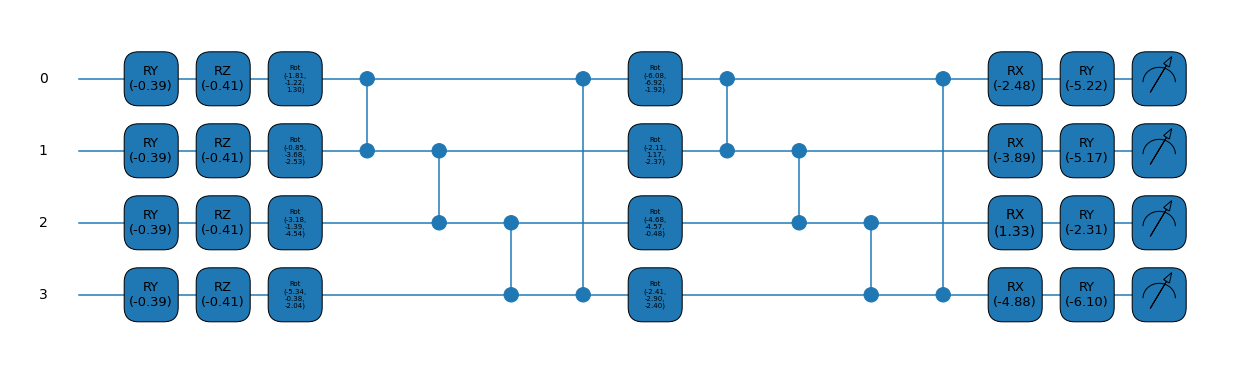

In [6]:
fig, ax = qml.draw_mpl(gen_circuit, decimals=2)(gen_weights)

In [7]:
sample_list = [gen_circuit(gen_weights) for i in range(5000)]

In [8]:
z = torch.stack(tuple(sample_list)).float().detach().numpy()

<Figure size 4320x2160 with 0 Axes>

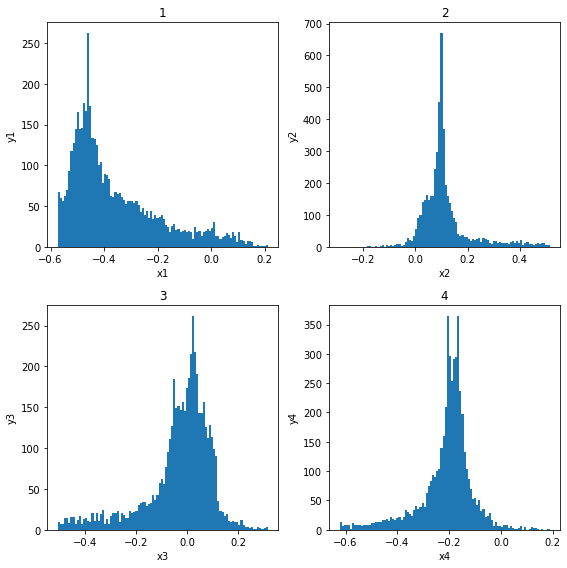

In [9]:
fig = plt.figure(figsize=(60, 30))
xaxes = ['x1','x2','x3','x4']
yaxes = ['y1','y2','y3','y4']
titles = '1234'
f,a = plt.subplots(2, 2, figsize=(8,8))
a = a.ravel()
for idx,ax in enumerate(a):
    ax.hist(z[:,idx], bins=100)
    ax.set_xlabel(xaxes[idx])
    ax.set_ylabel(yaxes[idx])
    ax.set_title(titles[idx])
plt.tight_layout()

In [10]:
sample_list = [gen_circuit(gen_weights, 'gaissian') for i in range(5000)]

In [11]:
z = torch.stack(tuple(sample_list)).float().detach().numpy()

<Figure size 4320x2160 with 0 Axes>

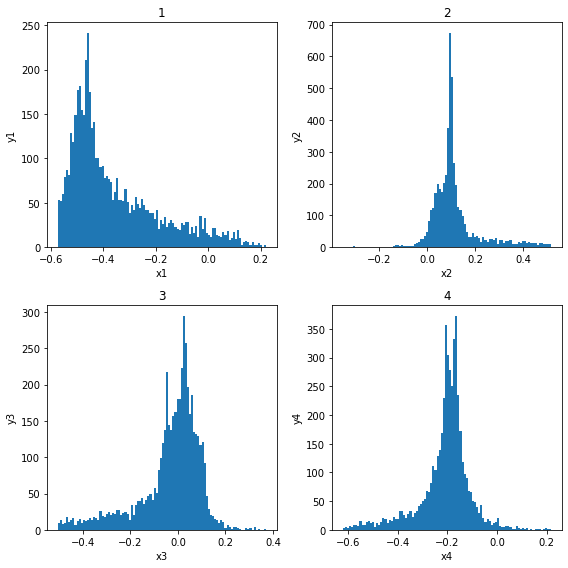

In [12]:
fig = plt.figure(figsize=(60, 30))
xaxes = ['x1','x2','x3','x4']
yaxes = ['y1','y2','y3','y4']
titles = '1234'
f,a = plt.subplots(2, 2, figsize=(8,8))
a = a.ravel()
for idx,ax in enumerate(a):
    ax.hist(z[:,idx], bins=100)
    ax.set_xlabel(xaxes[idx])
    ax.set_ylabel(yaxes[idx])
    ax.set_title(titles[idx])
plt.tight_layout()